In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tiempo = tf.constant([5,7,12,16,20], dtype=tf.float32)
masa = tf.constant([40,120,180,210,240], dtype= tf.float32)

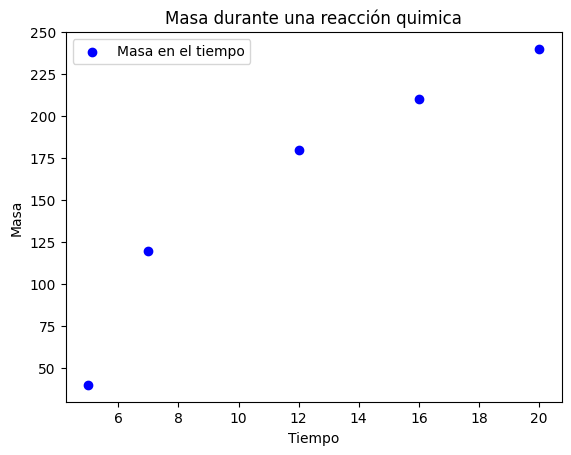

In [2]:
def plot_data(x, y):
    plt.scatter(x,y,label="Masa en el tiempo", color='blue')
    plt.xlabel("Tiempo")
    plt.ylabel("Masa")
    plt.title("Masa durante una reacción quimica")
    plt.legend()
    plt.show()

plot_data(tiempo, masa)

In [3]:
def simple_linear_regression(X, w0, b): #Asume data is tensor
    # r = tf.add(tf.multiply(w0, X) , b )
    r = (w0 * X) + b
    return r
r = simple_linear_regression(tiempo, 13, 1)
print(r)

tf.Tensor([ 66.  92. 157. 209. 261.], shape=(5,), dtype=float32)


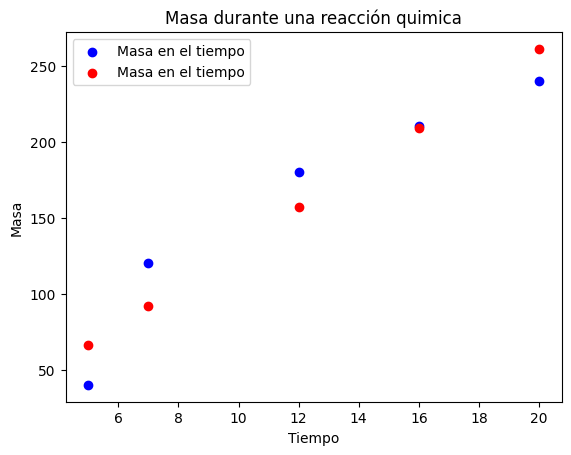

In [4]:
def plot_r(x, y, r):
    plt.scatter(x,y,label="Masa en el tiempo", color='blue')
    plt.scatter(x,r,label="Masa en el tiempo", color='red')
    plt.xlabel("Tiempo")
    plt.ylabel("Masa")
    plt.title("Masa durante una reacción quimica")
    plt.legend()
    plt.show()

plot_r(tiempo, masa, r.numpy())

In [5]:

def mse_loss(Y, Yp):
    e = Y - Yp
    se = tf.multiply(e,e)
    mse = tf.reduce_mean(se, axis=0)
    return mse

loss = mse_loss(masa, r)
print(loss)

tf.Tensor(486.2, shape=(), dtype=float32)


Preducuibes y Cálculo de costo para los siguientes valores
De W0 y b


In [10]:
W0 = [13,12,11,14,15,16,10,9,8]
b = [1,1,1,1,1,1,1,1,1]

loss = []

for w0, b1 in zip(W0, b):
    #Predicciones en datos de entrenamiento
    yp = simple_linear_regression(tiempo, w0, b1)
    #Calculo del costo
    cost = mse_loss(masa, yp)
    print("Calculating with:")
    print(w0, b1, cost.numpy())
    loss.append(cost)

Calculating with:
13 1 486.2
Calculating with:
12 1 636.2
Calculating with:
11 1 1135.8
Calculating with:
14 1 685.8
Calculating with:
15 1 1235.0
Calculating with:
16 1 2133.8
Calculating with:
10 1 1985.0
Calculating with:
9 1 3183.8
Calculating with:
8 1 4732.2


In [7]:
def loss_plot2D(W, J):
    plt.scatter(W,J,label="Costo de la predicción", color='r')
    plt.xlabel("W0")
    plt.ylabel("J")
    plt.title("Gráfica de costos al realizar las predicciones de masa")
    plt.legend()
    plt.show()

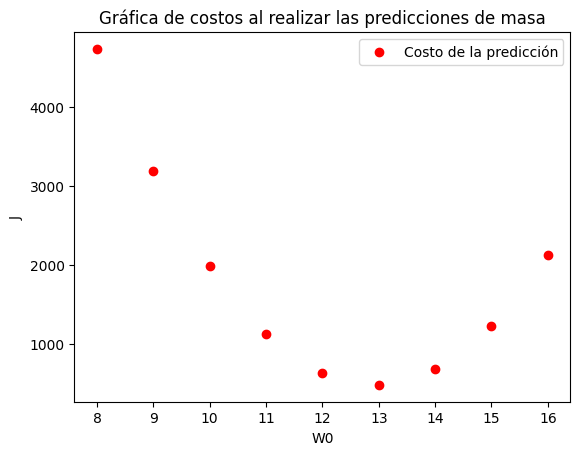

In [8]:
loss_plot2D(W0, loss)

In [20]:
## Calculating with values -100 to 100

minW = 0
minB = 0
minJ = None

W = []
B = []
J = []
for w0 in range (-100, 101, 1):
    W.append(w0)
    minJ = None
    minB = None
    for b in range (-100, 101, 1):
        yp = simple_linear_regression(tiempo, w0, b)
        #Calculo del costo
        cost = mse_loss(masa, yp)    
        if(b == -100 or cost.numpy() < minJ):
            minJ = cost.numpy()
            minB = b
    B.append(minB)
    J.append(minJ)

min_J = np.argmin(J)
print(min_J, W[min_J], B[min_J])

112 12 14


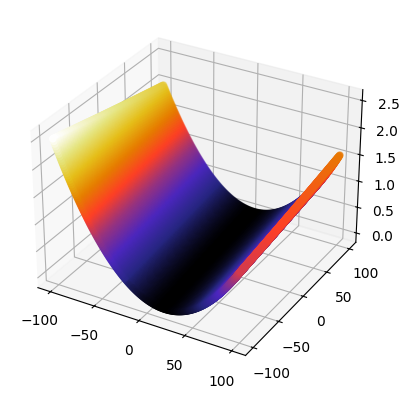

In [15]:
from mpl_toolkits import mplot3d

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(W, B, J, 'gray')

ax.scatter3D(W, B, J, c=J, cmap='CMRmap');

In [24]:
print("Min W:" + str(W[min_J]) + "& Min B:" + str(B[min_J]))



Min W:12& Min B:14
